# **Airport Zurich delays**
Analysis by Louisa and Salomé


### **Data Source**
The data used in this analysis is retrieved on a daily basis between August, 30th and September, 5th 2024 from the Flughafen Zürich API. Each evening after closure of the airport at 11pm, the flight data - both planned events and the actual events - from the corresonding day can be retrieved and stored in a csv file. The data is then merged and combined to one data set containing xxx observations.  

As the event data which can be retrieved from the API resets every day after midnight, we had to store the daily data every night and combine it to a final data set after the observation period.


###**Data description**###  
The data we use shows either a flight arrival at or departure from Zurich Airport. For each flight, we find information on the planned arrival or departure time, as well as the delay that might occur. The data set contains a total of XXX observations.


Zurich Airport operates under a nightban from 23:00 until 06:00 on the next day. Only in rare cases, as flights are delayed, airplanes are allowed to land between 23:00 and 23:30. Our data set only contains data until the regular operation time, as we retrieve the daily data latest at 23:00h and thus, cannot measure arrivals after that.

Table 1 shows the most important columns in the final data set. We measure each arrival and departure along with its estimated arrival / departure time as well as its actual arrival/ departure time. Further, we have information on the terminal, aircraft, airline as well as information about the origin or destination city.   

#### Table 1: Column names and values####
| Column Name          | Value            | Description                        |
|----------------------|------------------|------------------------------------|
| id                   |int               | Identifier                         |
| flightType           | character        | Arrival or departure               |
| SDT                  | datetime         | Scheduled Day of Operation         |
| STA                  | datetime         | Scheduled Time of Arrival          |
| ATA                  | datetime         | Actual Time of Arrival             |
| STD                  | datetime         | Scheduled Time of Departure        |
| ATD                  | datetime         | Actual Time of Departure           |
| ArrivalDelayMinutes  | int              | Arrival delay in minutes           |
| DepartureDelayMinutes| int              | Departure delay in minutes         |
| FLC                  | char             | Carrier                            |
| TER                  | int              | Terminal                           |
| GAT                  | char             | Gate Assigned                      |
| PDS                  | char             | Place of Destination               |
| POR                  | char             | Place of Origin                    |
| model                | char             | Aircraft Type                      |
| manufacturerName     | char             | Manufacturer                       |
| isCommercial         | bool             | Boolean for Commercial Flight      |
| airline              | char             | Airline Name                       |
| isSchengen           | bool             | Boolean for Schengen Flag          |

Due to the nightban at Zurich Airport [ZRH], we assume that the delays from one day are not taken into the next day. That means, each morning at 06:00, the scheduled flights should be able to depart as planned.

The traffic at Zurich Airport is higly dependent on the hub carrier SWISS International Airlines and their flight schedule. SWISS operates in 6 peak waves at Zurich Airport. During these periods, various constraints could lead to bottlenecks causing delays for departures. Table 2 shows an overview of the peak waves at Zurich Airport.  

####Table 2: Peak waves at Zurich airport
| Wave | Approx. time| Landings | Departures |
|-------|-----|-------|---|
| Wave 1|06:00 - 07:30| Short- and Longhaul | Shorthaul |
| Wave 2|08:30 - 10:00| Shorthaul | Short- and Longhaul |
| Wave 3|10:30 - 13:30| Short- and Longhaul | Short- and Longhaul |
| Wave 4|15:00 - 18:00| Short- and Longhaul | Short- and Longhaul |
| Wave 5|19:30 - 21:00| Shorthaul | Shorthaul |
| Wave 6|21:00 - 23:30| Shorthaul | Longhaul |

A wave system is characterized by a concentrated bundling of arrivals and departures, allowing for short and efficient transfer times for connecting passengers. This results in high infrastructure utilization during peak wave periods and comparatively low utilization during off-peak times. To ensure that the required transfer and turnaround times are met during the peak waves, an efficient resource and personell plan for the hub-critical infrastructures (such as runways, departure gates,  security and border control systems) is essential.




### **Hypotheses**###
Our analysis therefore examines the arrival and departure delays during the peak waves at Zurich airport. Predicting delays can contribute to a better and more efficient allocation of resources and people within the Zurich Airport to reduce the risk of bottlenecks.

As we know the wave system at Zurich airport as well as the fact, that delays from the previous day do not impact the operations on the current day, we hypothesize that:


*   1. Departure delays during the morning wave are significantly lower than delays during the afternoon/evening wave.

*   2.  Departures from the hub airlines SWISS and Edelweiss operate under lower delays than flights from other airlines.


The second hypothesis we like to examine comes from the fact that SWISS International Airlines, as the hub carrier, has more aircrafts on the ground than foreign airlines. Therefore, they can more easily switch to another aircraft that is ready to operate in case of delays from an incoming SWISS flight. So throughout the day, we expect flights from the SWISS airline to be less delayed on average compared to other airlines.

To test the first hypothesis, we reduce the number of waves bins from six to two, to have one morning and one afternoon/evening wave. As we observe flights only until 23:00, we miss the delayed flights after the offical start of the nightban. Therefore we define the evening wave only until 22:30, to allow for a buffer to observe delayed flights. With only two bins, we increase the number of observation per bin.

####Table 4: Adjusted morning and evening waves at Zurich airport
| Wave | Scheduled time|
|-------|-----|
| Morning wave|06:00 - 13:30|
| Evening wave|15:00 - 22:30|


### **Descriptive statistics**###




In [ ]:
###############################################################
### Descriptive Statistics ###
###############################################################

# import libraries
import time
import requests
import pandas as pd
from datetime import datetime
from google.colab import files
import glob
import matplotlib.pyplot as plt
import pytz
import seaborn as sns
import numpy as np
from scipy.stats import mannwhitneyu


# load final data set
uploaded = files.upload()

Saving final_data.csv to final_data.csv


In [ ]:
# read the final flight data into a dataframe ## for now add just one daily set of data
combined_flights = pd.read_csv('final_data.csv', sep=",")
combined_flights

,id,flightType,SDT,STA,TER,FLC,airlineLogo,FLN,REG,cityEn,...,ATA,RTK,FBR,LBR,statusCode,statusTextEn,STD,ATD,GAT,PDS
0,1721816,A,2024-09-05T00:00:00Z,2024-09-05T05:25:00Z,2,LX,https://media.flughafen-zuerich.ch/-/jssmedia/...,1683,HBAZG,Florence,...,2024-09-05T05:15:23Z,26.0,NaN,NaN,7.0,Landed,NaN,NaN,NaN,NaN
1,1721817,A,2024-09-05T00:00:00Z,2024-09-05T06:25:00Z,1,KM,https://media.flughafen-zuerich.ch/-/jssmedia/...,492,9HNEH,Malta,...,2024-09-05T06:26:37Z,14.0,2024-09-05T06:49:00Z,2024-09-05T06:49:00Z,7.0,Landed,NaN,NaN,NaN,NaN
2,1721818,A,2024-09-05T00:00:00Z,2024-09-05T14:25:00Z,1,LX,https://media.flughafen-zuerich.ch/-/jssmedia/...,1211,HBAZL,Oslo,...,2024-09-05T14:20:28Z,14.0,2024-09-05T14:36:00Z,2024-09-05T14:36:00Z,7.0,Landed,NaN,NaN,NaN,NaN
3,1721819,A,2024-09-05T00:00:00Z,2024-09-05T06:55:00Z,2,AA,https://media.flughafen-zuerich.ch/-/jssmedia/...,92,N879BH,Philadelphia,...,2024-09-05T07:22:53Z,23.0,2024-09-05T07:41:37Z,2024-09-05T08:04:49Z,7.0,Landed,NaN,NaN,NaN,NaN
4,1721820,A,2024-09-05T00:00:00Z,2024-09-05T14:55:00Z,1,LX,https://media.flughafen-zuerich.ch/-/jssmedia/...,1223,HBAZK,Gothenburg,...,2024-09-05T15:24:01Z,14.0,2024-09-05T15:45:00Z,2024-09-05T15:45:00Z,7.0,Landed,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5445,1796612,D,2024-08-30T00:00:00Z,NaN,NaN,NJE,NaN,969,CSGLY,Munich,...,NaN,NaN,NaN,NaN,4.0,Departed,2024-08-30T16:45:00Z,2024-08-30T16:41:53Z,NaN,MUC
5446,1796614,A,2024-08-30T00:00:00Z,2024-08-30T15:26:00Z,1.0,ZRH,NaN,5,HBZQH,Basel,...,2024-08-30T15:37:32Z,NaN,NaN,NaN,7.0,Landed,NaN,NaN,NaN,NaN
5447,1796616,D,2024-08-30T00:00:00Z,NaN,NaN,ZRH,NaN,14,HBZRY,Cranfield,...,NaN,NaN,NaN,NaN,4.0,Departed,2024-08-30T16:20:00Z,2024-08-30T16:27:02Z,NaN,XUD
5448,1796617,A,2024-08-30T00:00:00Z,2024-08-30T18:40:00Z,2.0,2L,https://media.flughafen-zuerich.ch/-/jssmedia/...,9529,HBJVW,Milan,...,2024-08-30T20:38:05Z,NaN,NaN,NaN,7.0,Landed,NaN,NaN,NaN,NaN


In [ ]:
########################################################
### date variables and delays ###
########################################################

#replace NaN in Schengen with FALSE
combined_flights['isSchengen'].fillna(False, inplace=True)
#filter for only commercial flights (no General Aviation or Business aviation)
combined_flights = combined_flights[combined_flights['isCommercial'] == True]


# # # mutate date variables
# combined_flights.loc[:, 'STA'] = pd.to_datetime(combined_flights['STA']) + pd.Timedelta(hours=2)
# combined_flights.loc[:, 'ATA'] = pd.to_datetime(combined_flights['ATA']) +pd.Timedelta(hours=2)
# combined_flights.loc[:, 'STD'] = pd.to_datetime(combined_flights['STD']) +pd.Timedelta(hours=2)
# combined_flights.loc[:, 'ATD'] = pd.to_datetime(combined_flights['ATD']) +pd.Timedelta(hours=2)

combined_flights['STA'] = pd.to_datetime(combined_flights['STA']) +pd.Timedelta(hours=2)
combined_flights['ATA'] = pd.to_datetime(combined_flights['ATA']) +pd.Timedelta(hours=2)
combined_flights['STD'] = pd.to_datetime(combined_flights['STD']) +pd.Timedelta(hours=2)
combined_flights['ATD'] = pd.to_datetime(combined_flights['ATD']) +pd.Timedelta(hours=2)

# # Create new column 'ArrivalDelayMinutes' und 'DepartureDelayMinutes'
combined_flights['ArrivalDelayMinutes'] = ((combined_flights['ATA'] - combined_flights['STA']).dt.total_seconds())/60
combined_flights['DepartureDelayMinutes'] = ((combined_flights['ATD'] - combined_flights['STD']).dt.total_seconds())/60
combined_flights.to_csv('df.csv', index=False)

#get variables
days_observed = combined_flights['SDT'].nunique()
total_arrivals = combined_flights['flightType'].value_counts()['A']
total_departures = combined_flights['flightType'].value_counts()['D']
total_flights = total_arrivals + total_departures
n_diff_Carrier = combined_flights['FLC'].nunique()
n_diff_TYP = combined_flights['TYP'].nunique()
n_diff_Manufacturer = combined_flights['manufacturerName'].nunique()
n_diff_Origin = combined_flights['POR'].nunique()
n_diff_Destination = combined_flights['PDS'].nunique()
mean_ArrDelay = combined_flights['ArrivalDelayMinutes'].mean()
median_ArrDelay = combined_flights['ArrivalDelayMinutes'].median()
# Q1_ArrDelay = combined_flights['ArrivalDelayMinutes'].quantile(0.25)
# Q3_ArrDelay = combined_flights['ArrivalDelayMinutes'].quantile(0.75)
mean_DepDelay = combined_flights['DepartureDelayMinutes'].mean()
median_DepDelay = combined_flights['DepartureDelayMinutes'].median()
# Q1_DepDelay = combined_flights['DepartureDelayMinutes'].quantile(0.25)
# Q3_DepDelay = combined_flights['DepartureDelayMinutes'].quantile(0.75)

mean_ArrDelay= round(mean_ArrDelay, 2)
median_ArrDelay = round(median_ArrDelay, 2)
mean_DepDelay = round(mean_DepDelay, 2)
median_DepDelay = round(median_DepDelay, 2)

# create summary statistics about flights (arrival / departures)
# create bar charts
from IPython.display import Markdown, display

table_md = f"""
###Observations###

| Variable             | Observations|
|-------------------------|-------|
| Number of days observed | {days_observed} |
|Total Arrivals | {total_arrivals} |
|Total Departures| {total_departures} |
|Total Flights| {total_flights}|
|Number of different Airlines| {n_diff_Carrier} |
|Number of different TYP| {n_diff_TYP} |
|Number of different Manufacturers | {n_diff_Manufacturer} |
|Number of different Origins| {n_diff_Origin} |
|Number of different Destinations| {n_diff_Destination} |
|Mean Arrival Delay | {mean_ArrDelay} |
|Median Arrival Delay | {median_ArrDelay} |
|Mean Departure Delay | {mean_DepDelay} |
|Median Departure Delay | {median_DepDelay} |

"""
# Display Table
display(Markdown(table_md))

<ipython-input-3-f2e85acc6bd4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_flights['STA'] = pd.to_datetime(combined_flights['STA']) +pd.Timedelta(hours=2)
<ipython-input-3-f2e85acc6bd4>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_flights['ATA'] = pd.to_datetime(combined_flights['ATA']) +pd.Timedelta(hours=2)
<ipython-input-3-f2e85acc6bd4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val


###Observations###

| Variable             | Observations|
|-------------------------|-------|
| Number of days observed | 7 |
|Total Arrivals | 2452 |
|Total Departures| 2444 |
|Total Flights| 4896|
|Number of different Airlines| 66 |
|Number of different TYP| 26 |
|Number of different Manufacturers | 5 |
|Number of different Origins| 178 |
|Number of different Destinations| 178 |
|Mean Arrival Delay | 15.33 |
|Median Arrival Delay | 7.57 |
|Mean Departure Delay | 25.21 |
|Median Departure Delay | 16.72 |



2155


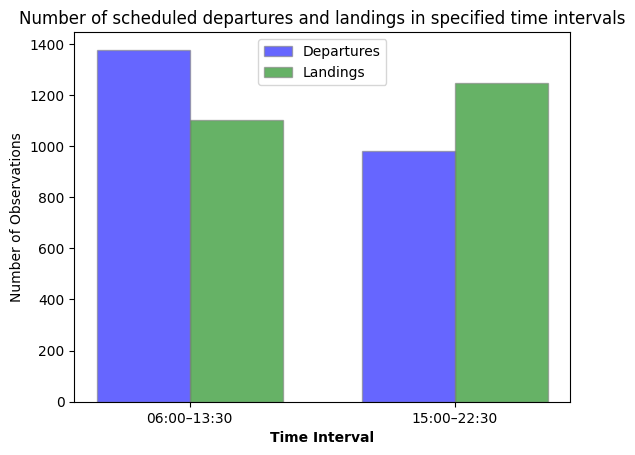

Number of scheduled departures in the morning are bigger than in the afternoon / evening.
Number of scheduled arrivals in the morning are lower than in the afternoon / evening.


In [ ]:
########################################################
### number of scheduled flights per wave bin
########################################################
df   = pd.read_csv('df.csv', sep=",")

df['STA'] = pd.to_datetime(df['STA'])
df['STD'] = pd.to_datetime(df['STD'])
df['ATA'] = pd.to_datetime(df['ATA'])
df['ATD'] = pd.to_datetime(df['ATD'])
time_bins = [
    (6, 13.5),
    (15,22.5)]

# Function to categorize the times
def categorize_time(hour):
    if 6 <= hour < 13.5:
        return '06:00–13:30'
    elif 15 <= hour < 22.5:
        return '15:00–22:30'
    else:
        return 'Other'  # Exclude observations outside the specified intervals

# Apply the categorization
df['time_category'] = df.apply(
    lambda row: categorize_time(row['STA'].hour) if row['flightType'] == 'A' else categorize_time(row['STD'].hour),
    axis=1
)
df['time_category_actual'] = df.apply(
    lambda row: categorize_time(row['ATA'].hour) if row['flightType'] == 'A' else categorize_time(row['ATD'].hour),
    axis=1
)

# add a boolean variable to TRUE, if flight is delayed more than 15 mins
df['isDelayed'] = (
    (df['DepartureDelayMinutes'] > 15) |
    (df['ArrivalDelayMinutes'] > 15)
)
# df['isDelayed'] = df['time_category'] != df['time_category_actual']
num_delayed_flights = df['isDelayed'].sum()
print(num_delayed_flights)
# save subset
df.to_csv('df_with_time_category.csv', index=False)

departures = df[df['flightType'] == 'D']
landings = df[df['flightType'] == 'A']

# save subsets
departures.to_csv('departures.csv', index=False)
landings.to_csv('landings.csv', index=False)

# Count the number of observations in each category
dep_counts = departures['time_category'].value_counts().reindex(['06:00–13:30', '15:00–22:30'])
land_counts = landings['time_category'].value_counts().reindex(['06:00–13:30', '15:00–22:30'])

# Plot the bar chart with adjusted transparency
bar_width = 0.35  # Width of the bars

# Positions of the bars on the x-axis
r1 = range(len(dep_counts))
r2 = [x + bar_width for x in r1]

# Create the bar chart with transparency
plt.bar(r1, dep_counts, color='blue', width=bar_width, edgecolor='grey', label='Departures', alpha=0.6)
plt.bar(r2, land_counts, color='green', width=bar_width, edgecolor='grey', label='Landings', alpha=0.6)

# Add labels and title
plt.xlabel('Time Interval', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(dep_counts))], ['06:00–13:30', '15:00–22:30'])
plt.ylabel('Number of Observations')
plt.title('Number of scheduled departures and landings in specified time intervals')

# Add legend
plt.legend()
# plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees and align them to the right

plt.show()

print("Number of scheduled departures in the morning are bigger than in the afternoon / evening.")
print("Number of scheduled arrivals in the morning are lower than in the afternoon / evening.")


FRAGE AN SALOME:  
Fazit oberhalb "Number of scheduled depratures in the morning are bigger than in der afternoon". ich interpretiere die Grafik andersherum... eventuell verstehe ich es nicht korrekt?

Antwort Salome: Also der linke balken ist ja grösser als der rechte -> daher mehr flüge am morgen als am nachmittag

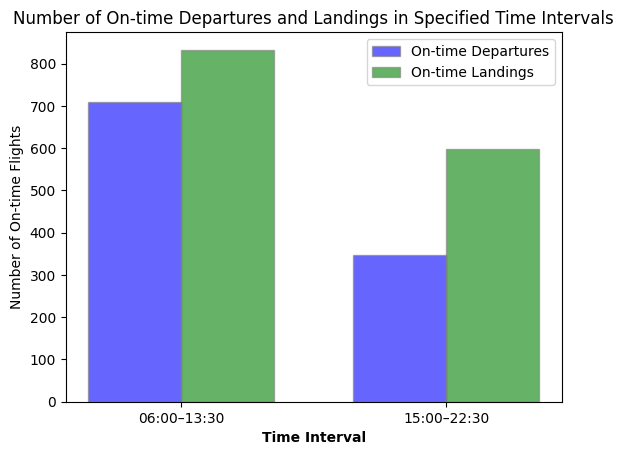

Number of on-time flights are for both categories larger in th morning than in the afternoon / evening.


In [ ]:
########################################################
### number of on-time flights -- flights that have max 15 delay minutes ###
########################################################

# Filter for flights where isDelayed is False (on-time flights)
on_time_departures = departures[departures['isDelayed'] == False]
on_time_landings = landings[landings['isDelayed'] == False]

# Count the number of on-time observations in each category
dep_counts_on_time = on_time_departures['time_category_actual'].value_counts().reindex(['06:00–13:30', '15:00–22:30'])
land_counts_on_time = on_time_landings['time_category_actual'].value_counts().reindex(['06:00–13:30', '15:00–22:30'])

# Plot the bar chart with adjusted transparency
bar_width = 0.35  # Width of the bars

# Positions of the bars on the x-axis
r1 = range(len(dep_counts_on_time))
r2 = [x + bar_width for x in r1]

# Create the bar chart with transparency for on-time flights
plt.bar(r1, dep_counts_on_time, color='blue', width=bar_width, edgecolor='grey', label='On-time Departures', alpha=0.6)
plt.bar(r2, land_counts_on_time, color='green', width=bar_width, edgecolor='grey', label='On-time Landings', alpha=0.6)

# Add labels and title
plt.xlabel('Time Interval', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(dep_counts_on_time))], ['06:00–13:30', '15:00–22:30'])
plt.ylabel('Number of On-time Flights')
plt.title('Number of On-time Departures and Landings in Specified Time Intervals')

# Add legend
plt.legend()
# plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees and align them to the right

# Show the plot
plt.show()
print("Number of on-time flights are for both categories larger in th morning than in the afternoon / evening.")


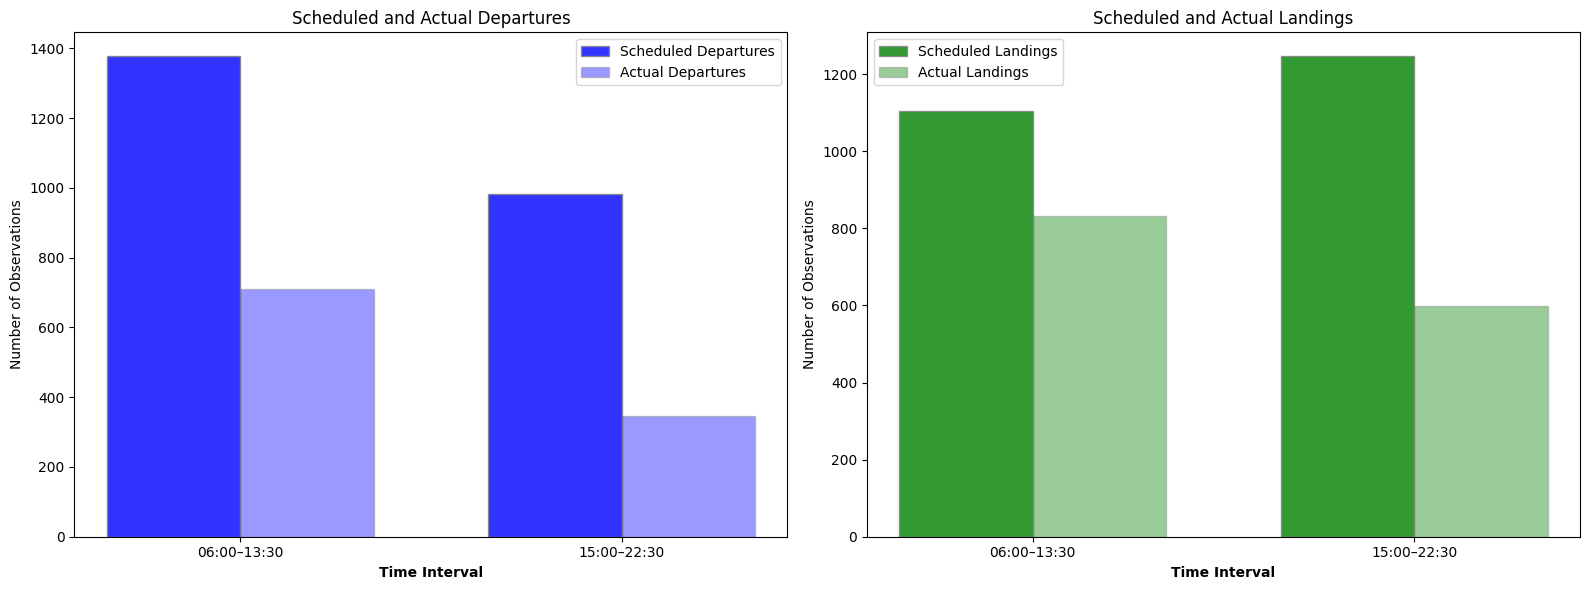

The difference between actual and scheduled landings is clearly bigger in the afternoon than in the morning.
The difference between actual and scheduled departures seems similar in the afternoon and in the morning. But as the scheduled number differs, we should look at the shares of on-time flights
This supports our first hypothesis, that morning flights are less likely delayed.


In [ ]:
########################################################
### combined view: number of scheduled flights and number of which are actually observed per wave bin ###
########################################################

departures   = pd.read_csv('departures.csv', sep=",")
landings   = pd.read_csv('landings.csv', sep=",")

# Filter for on-time flights where isDelayed is False
on_time_departures = departures[departures['isDelayed'] == False]
on_time_landings = landings[landings['isDelayed'] == False]

# Count the number of scheduled and on-time flights in each time category
dep_counts = departures['time_category'].value_counts().reindex(['06:00–13:30', '15:00–22:30'])
dep_counts_on_time = on_time_departures['time_category_actual'].value_counts().reindex(['06:00–13:30', '15:00–22:30'])

land_counts = landings['time_category'].value_counts().reindex(['06:00–13:30', '15:00–22:30'])
land_counts_on_time = on_time_landings['time_category_actual'].value_counts().reindex(['06:00–13:30', '15:00–22:30'])

dep_share = dep_counts / dep_counts
dep_share_ontime = dep_counts_on_time /dep_counts
land_share = land_counts/ land_counts
land_share_ontime = land_counts_on_time / land_counts
# Positions of the bars on the x-axis
r1 = range(len(dep_counts))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width + 0.1 for x in r1]  # Positions for landing bars
r4 = [x + bar_width + 0.1 + bar_width for x in r1]  # Positions for actual landing bars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # Adjust figure size as needed

# Plot departures
ax1.bar(r1, dep_counts, color='blue', width=bar_width, edgecolor='grey', label='Scheduled Departures', alpha=0.8)
ax1.bar(r2, dep_counts_on_time, color='blue', width=bar_width, edgecolor='grey', label='Actual Departures', alpha=0.4)
ax1.set_xlabel('Time Interval', fontweight='bold')
ax1.set_ylabel('Number of Observations')
ax1.set_title('Scheduled and Actual Departures')
ax1.set_xticks([r + bar_width/2 for r in r1])
ax1.set_xticklabels(['06:00–13:30', '15:00–22:30'])
ax1.legend()
# ax1.tick_params(axis='x', rotation=45)

# Plot landings
ax2.bar(r3, land_counts, color='green', width=bar_width, edgecolor='grey', label='Scheduled Landings', alpha=0.8)
ax2.bar(r4, land_counts_on_time, color='green', width=bar_width, edgecolor='grey', label='Actual Landings', alpha=0.4)
ax2.set_xlabel('Time Interval', fontweight='bold')
ax2.set_ylabel('Number of Observations')
ax2.set_title('Scheduled and Actual Landings')
ax2.set_xticks([r + bar_width/2 for r in r3])
ax2.set_xticklabels(['06:00–13:30', '15:00–22:30'])
ax2.legend()
# ax2.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

plt.show()

print("The difference between actual and scheduled landings is clearly bigger in the afternoon than in the morning.")
print("The difference between actual and scheduled departures seems similar in the afternoon and in the morning. But as the scheduled number differs, we should look at the shares of on-time flights")
print("This supports our first hypothesis, that morning flights are less likely delayed.")


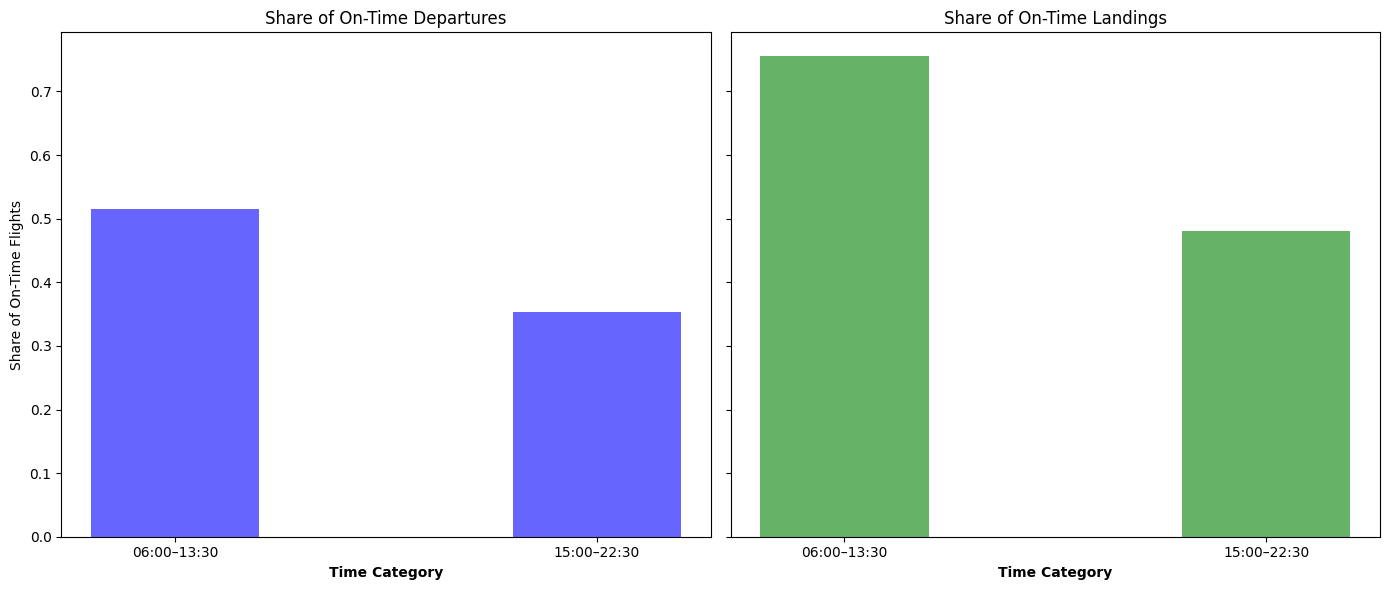

In [ ]:
########################################################
### share of on-time departures ###
########################################################

departures   = pd.read_csv('departures.csv', sep=",")
landings   = pd.read_csv('landings.csv', sep=",")

# Filter for on-time flights where isDelayed is False
on_time_departures = departures[departures['isDelayed'] == False]
on_time_landings = landings[landings['isDelayed'] == False]

# Count the number of scheduled and on-time flights in each time category
dep_counts = departures['time_category'].value_counts().reindex(['06:00–13:30', '15:00–22:30'])
dep_counts_on_time = on_time_departures['time_category_actual'].value_counts().reindex(['06:00–13:30', '15:00–22:30'])

land_counts = landings['time_category'].value_counts().reindex(['06:00–13:30', '15:00–22:30'])
land_counts_on_time = on_time_landings['time_category_actual'].value_counts().reindex(['06:00–13:30', '15:00–22:30'])

dep_share = dep_counts / dep_counts
dep_share_ontime = dep_counts_on_time /dep_counts
land_share = land_counts/ land_counts
land_share_ontime = land_counts_on_time / land_counts

# Prepare bar plot data
n_bins = len(dep_counts)  # Number of time bins
bar_width = 0.4  # Width of the bars

# Positions of the bars on the x-axis
# Prepare data for plotting
time_categories = ['06:00–13:30', '15:00–22:30']
x = range(len(time_categories))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for departures
ax1.bar(x, dep_share_ontime, width=bar_width, color='blue', alpha=0.6)
ax1.set_xlabel('Time Category', fontweight='bold')
ax1.set_ylabel('Share of On-Time Flights')
ax1.set_title('Share of On-Time Departures')
ax1.set_xticks(x)
ax1.set_xticklabels(time_categories)

# Plot for landings
ax2.bar(x, land_share_ontime, width=bar_width, color='green', alpha=0.6)
ax2.set_xlabel('Time Category', fontweight='bold')
ax2.set_title('Share of On-Time Landings')
ax2.set_xticks(x)
ax2.set_xticklabels(time_categories)

# Add a tight layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()



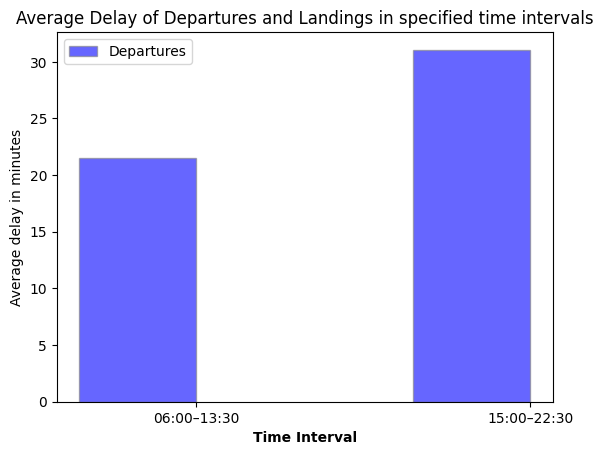

In [ ]:
########################################################
### average delay per wave bin
########################################################

departures  = pd.read_csv('departures.csv', sep=",")
landings   = pd.read_csv('landings.csv', sep=",")

# set negative delays to 0
departures['DepartureDelayMinutes'] = departures['DepartureDelayMinutes'].clip(lower=0)
landings['ArrivalDelayMinutes'] = landings['ArrivalDelayMinutes'].clip(lower=0)

# calculate average delays
dep_delay_avg = departures.groupby('time_category')['DepartureDelayMinutes'].mean().reindex(['06:00–13:30', '15:00–22:30'], fill_value=0)
arr_delay_avg = landings.groupby('time_category')['ArrivalDelayMinutes'].mean().reindex(['06:00–13:30', '15:00–22:30'], fill_value=0)

# Plot the bar chart with adjusted transparency
bar_width = 0.35  # Width of the bars

# Positions of the bars on the x-axis
r1 = range(len(dep_delay_avg))
r2 = [x + bar_width for x in r1]

# Create the bar chart with transparency
plt.bar(r1, dep_delay_avg, color='blue', width=bar_width, edgecolor='grey', label='Departures', alpha=0.6)
# plt.bar(r2, arr_delay_avg, color='green', width=bar_width, edgecolor='grey', label='Landings', alpha=0.6)

# Add labels and title
plt.xlabel('Time Interval', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(dep_counts))], ['06:00–13:30', '15:00–22:30'])
plt.ylabel('Average delay in minutes')
plt.title('Average Delay of Departures and Landings in specified time intervals')
# plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees and align them to the right

# Add legend
plt.legend()

# Display the plot
plt.show()


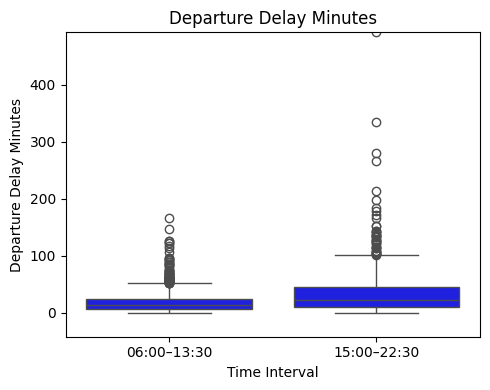

In [ ]:
########################################################
### boxplot delay per wave bin
########################################################

flights_commercial = pd.read_csv('df_with_time_category.csv', sep=",")

# set negative delays to 0
flights_commercial['DepartureDelayMinutes'] = flights_commercial['DepartureDelayMinutes'].clip(lower=0)

# filter for morning and evening wave flights only
flights_commercial = flights_commercial[flights_commercial['time_category_actual'] != 'Other']
unique_categories = sorted(flights_commercial['time_category_actual'].unique())
# find minimum and max for y Axis
y_min = min(flights_commercial['ArrivalDelayMinutes'].min(),flights_commercial['DepartureDelayMinutes'].min())
y_max = max(flights_commercial['ArrivalDelayMinutes'].max(),flights_commercial['DepartureDelayMinutes'].max())
# Set up the matplotlib figure
plt.figure(figsize=(5, 4))

# # Create the second boxplot for ArrivalDelayMinutes
# plt.subplot(1, 2, 1)
# sns.boxplot(x='time_category_actual', y='ArrivalDelayMinutes', data=flights_commercial, order = unique_categories, color = 'green')
# plt.title('Arrival Delay Minutes')
# plt.ylabel('Arrival Delay Minutes')
# plt.xlabel('Time Interval')
# plt.xticks(rotation=45, ha='right')
# plt.ylim(y_min,y_max)

# Create the first boxplot for DepartureDelayMinutes
# plt.subplot(1, 2, 2)
sns.boxplot(x='time_category_actual', y='DepartureDelayMinutes', data=flights_commercial, order = unique_categories, color = 'blue')
plt.title('Departure Delay Minutes')
plt.ylabel('Departure Delay Minutes')
plt.xlabel('Time Interval')
# plt.xticks(rotation=45, ha='right')
plt.ylim(y_min,y_max)

# Show the plots
plt.tight_layout()

plt.show()


#### **First Hypothesis testing**

According to the visualisations, it seems like the morning flights are indeed less likely to be delayed compared to the afternoon/eveining flights.  
Now we want to test, whether the difference is statistically significant.

For this, we use a two sample test, as we compare the morning bin with the evening bin. As a first step, we check normality:

**check normality**

TO BE CONTINUED

Statistic: 0.6942
p-value: 0.0000
The data does not appear to be normally distributed (reject H0)


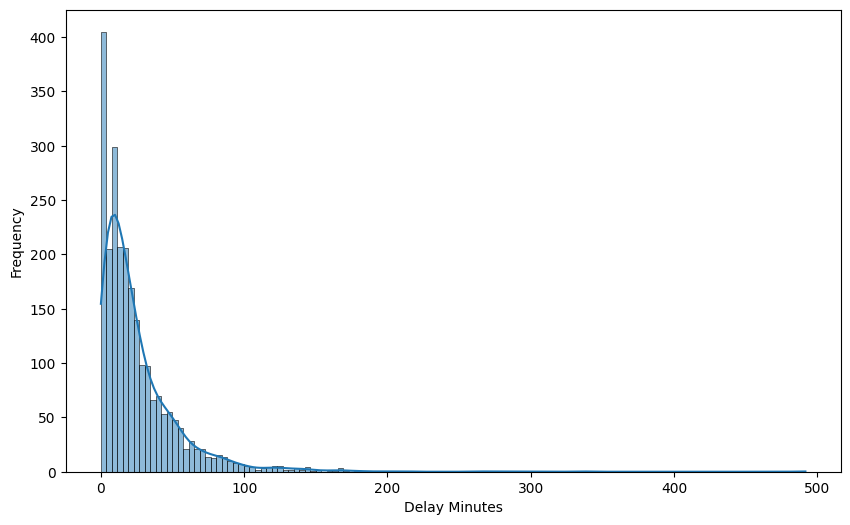

In [ ]:
########################################################
### normality check
########################################################
from scipy import stats
departures  = pd.read_csv('departures.csv', sep=",")

# set negative delays to 0
departures = departures['DepartureDelayMinutes'].clip(lower=0).dropna()
departures
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
statistic, p_value = stats.shapiro(departures)

print(f"Statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value > 0.05:
   print("The data appears to be normally distributed (fail to reject H0)")
else:
     print("The data does not appear to be normally distributed (reject H0)")

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(departures, kde=True)
plt.xlabel("Delay Minutes")
plt.ylabel("Frequency")
plt.show()

print("\n")

# not normally distributed


In [ ]:
# Separate the data into two groups based on bin
from scipy.stats import mannwhitneyu

departures  = pd.read_csv('departures.csv', sep=",")
# set negative delays to 0
departures['DepartureDelayMinutes'] = departures['DepartureDelayMinutes'].clip(lower=0)
departures
group_mornings = departures[departures['time_category'] == '06:00–13:30']
group_evenings = departures[departures['time_category'] == '15:00–22:30']

group_mornings = group_mornings["DepartureDelayMinutes"].dropna()
group_evenings = group_evenings["DepartureDelayMinutes"].dropna()

stat, p_value = mannwhitneyu(group_mornings, group_evenings, alternative='less')


# Display the results
print('Mann-Whitney U test statistic:', stat)
print('p-value:', p_value)
print(p_value, "is smaller than 0.05. The test is strongly significant.")

Mann-Whitney U test statistic: 494572.5
p-value: 9.92261395316958e-21
9.92261395316958e-21 is smaller than 0.05. The test is strongly significant.


# LOUISA :
LX / WK gegen alle anderen commercials

LX / WK versus andere innerhalb Schenge / ausserhalb schengen

In [ ]:
flights_commercial['TYP'].unique()
flights_commercial['NB_WB'] = flights_commercial['TYP'].apply(lambda x: 'WB' if x in ['330', '777', '787', '350', '380', '340'] else 'NB')

In [ ]:
# Group LX and WK into one group and all the other airlines into a different
flights_commercial['FLC_Group'] = flights_commercial['FLC'].apply(lambda x: 'LX/WK' if x in ['LX', 'WK'] else 'Other')

CarrierSchengenTest = flights_commercial.groupby(['FLC_Group','isSchengen'])['DepartureDelayMinutes'].median().unstack()
CarrierTypTest = flights_commercial.groupby(['FLC_Group','TYP'])['DepartureDelayMinutes'].median().unstack()
CarrierManufacturerTest = flights_commercial.groupby(['FLC_Group','manufacturerName'])['DepartureDelayMinutes'].median().unstack()
CarrierDestinationTest = flights_commercial.groupby(['FLC_Group','PDS'])['DepartureDelayMinutes'].median().unstack()

# drop Values that the Groups dont have in common
CarrierSchengenTest = CarrierSchengenTest.dropna(axis=1, how='any')
CarrierTypTest = CarrierTypTest.dropna(axis=1, how='any')
CarrierManufacturerTest = CarrierManufacturerTest.dropna(axis=1, how='any')
CarrierDestinationTest = CarrierDestinationTest.dropna(axis=1, how='any')
print(CarrierSchengenTest)
# print(CarrierTypTest)
# print(CarrierManufacturerTest)
# print(CarrierDestinationTest)

isSchengen      False  True 
FLC_Group                   
LX/WK       19.266667  15.85
Other       18.000000  15.25


<ipython-input-16-72377b1f983b>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(schengen_cat)


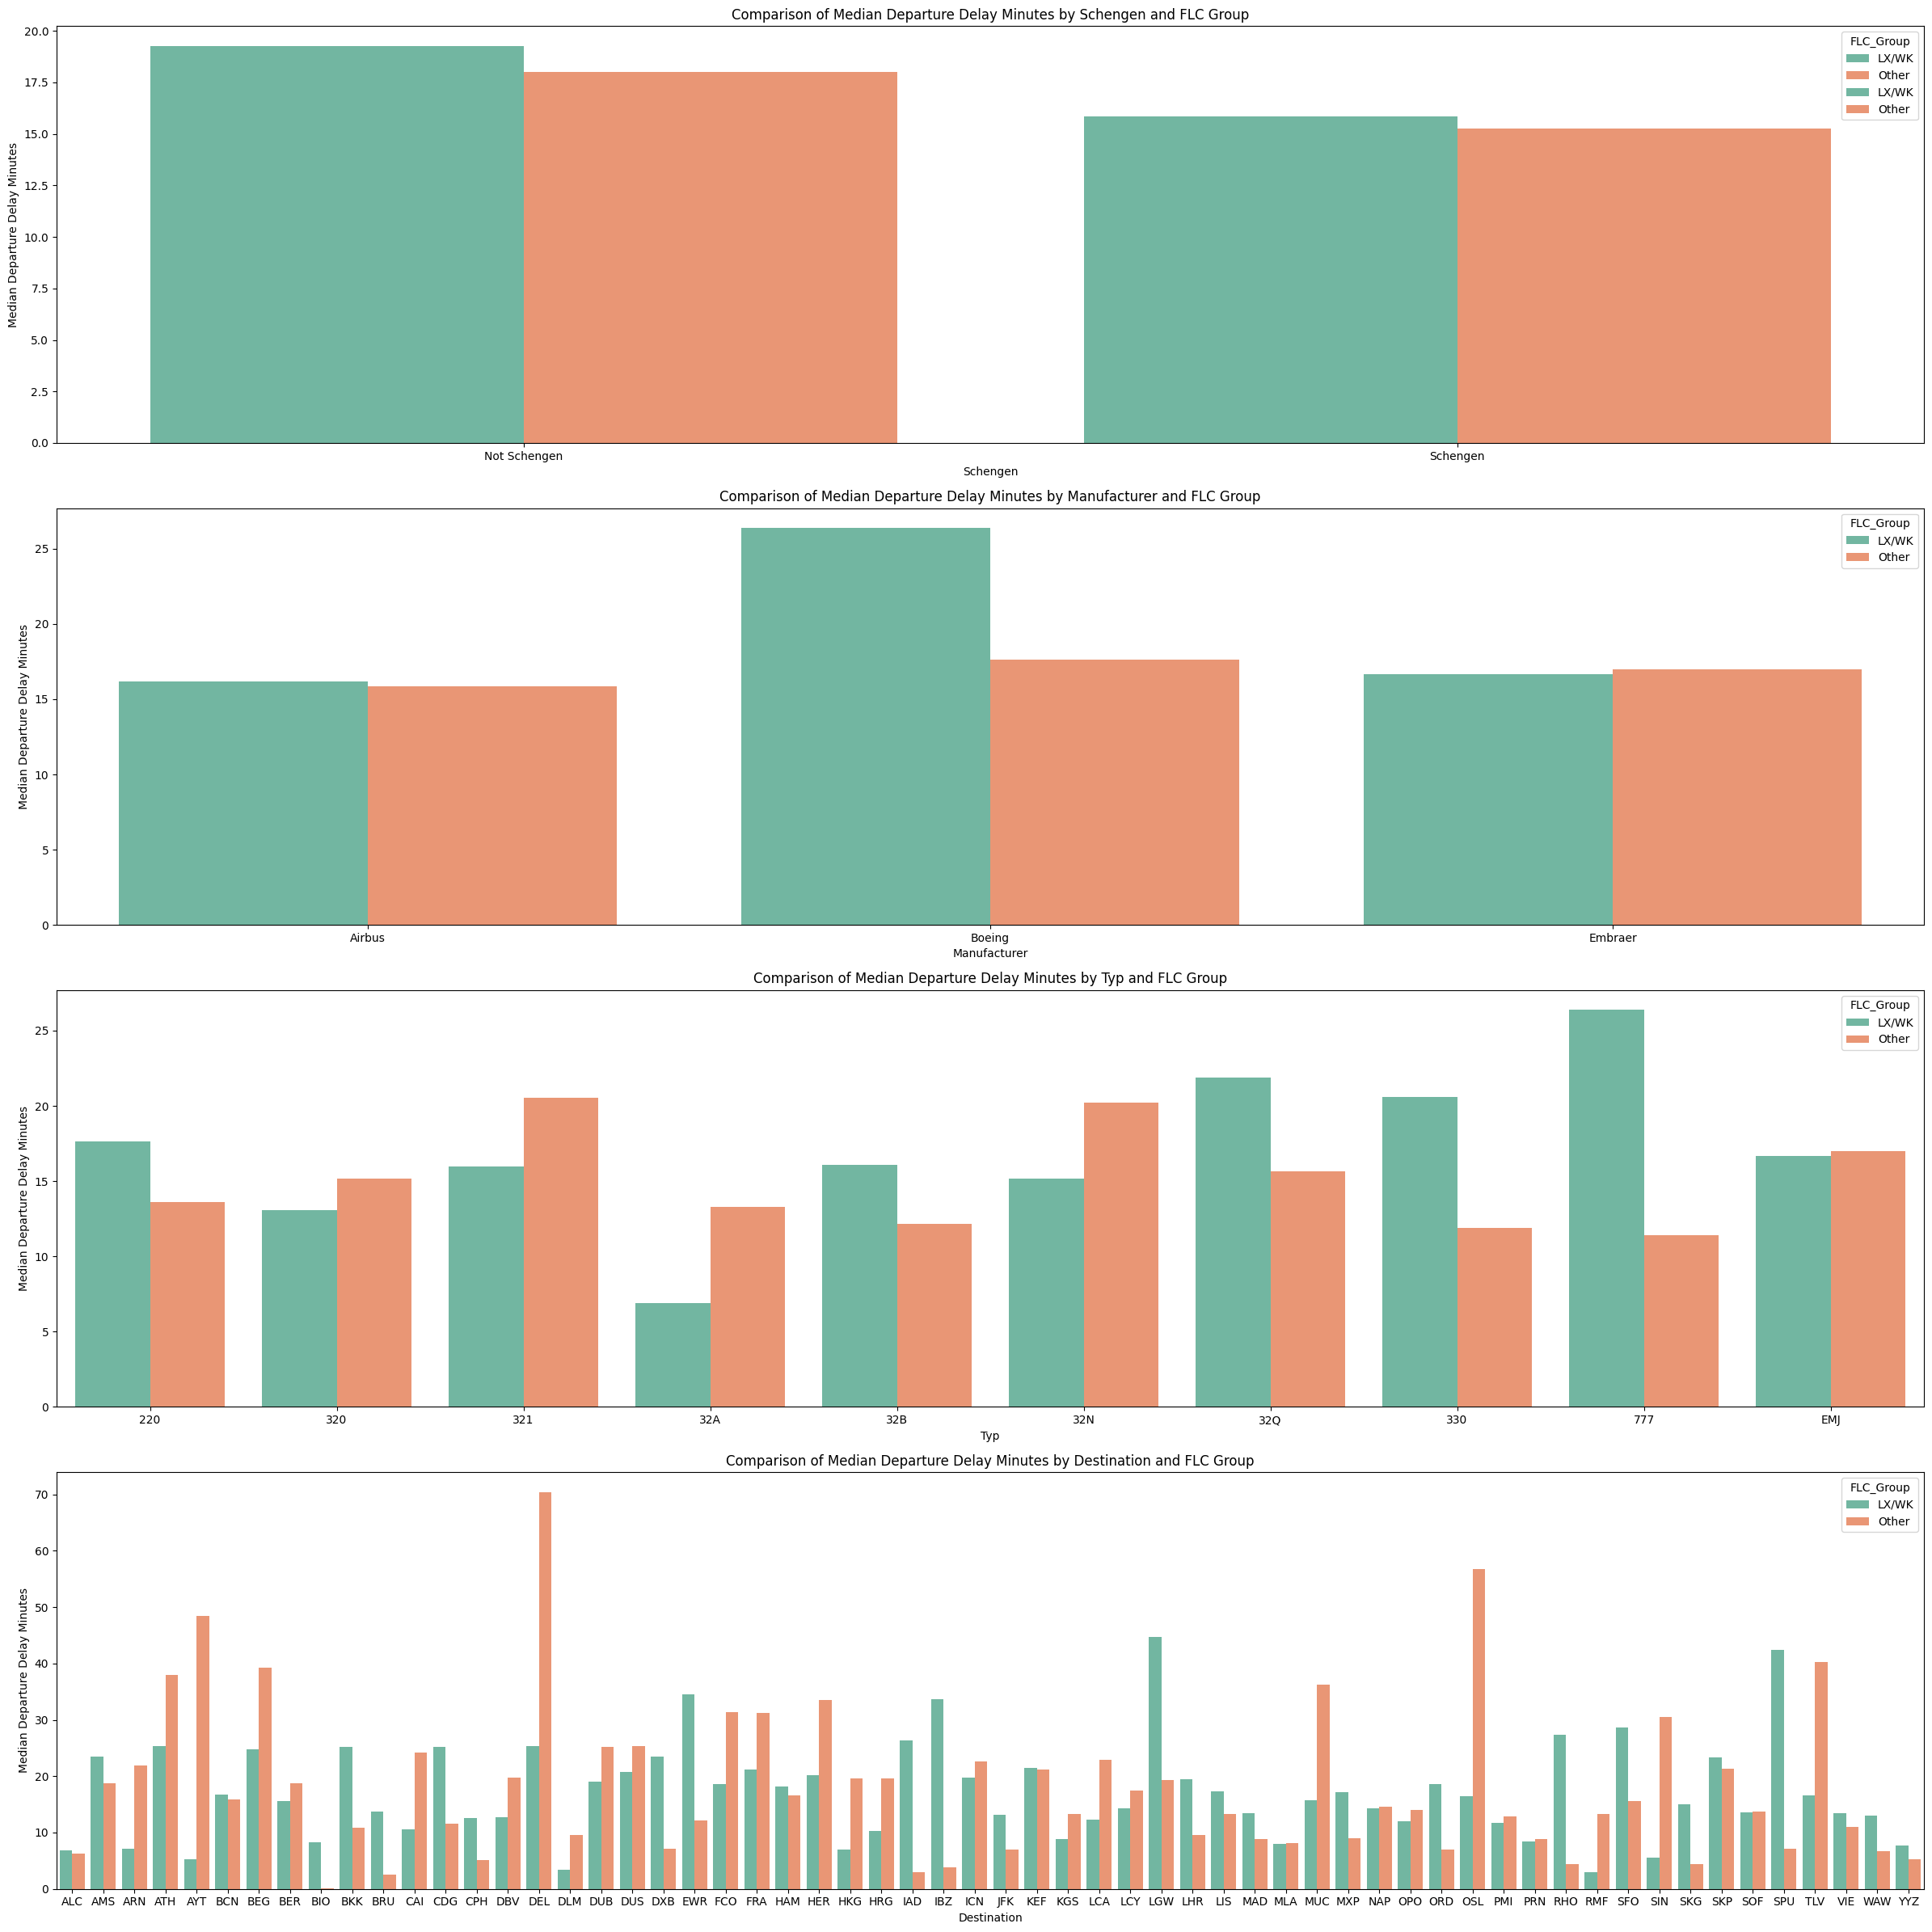

In [ ]:
# Reset the index to convert the DataFrame into a format suitable for Seaborn
CarrierSchengenTest_melted = CarrierSchengenTest.reset_index().melt(id_vars='FLC_Group', var_name='isSchengen', value_name='MedianDepartureDelayMinutes')
CarrierManufacturerTest_melted = CarrierManufacturerTest.reset_index().melt(id_vars='FLC_Group', var_name='Manufacturer', value_name='MedianDepartureDelayMinutes')
CarrierTypTest_melted = CarrierTypTest.reset_index().melt(id_vars='FLC_Group', var_name='TYP', value_name='MedianDepartureDelayMinutes')
CarrierDestinationTest_melted = CarrierDestinationTest.reset_index().melt(id_vars='FLC_Group', var_name='PDS', value_name='MedianDepartureDelayMinutes')


# Plotting with Seaborn
plt.figure(figsize=(24, 24))

schengen_cat = ['Not Schengen', 'Schengen']

#Plot Schengen
plt.subplot(4,1,1)
sns.barplot(data=CarrierSchengenTest_melted, x='isSchengen', y='MedianDepartureDelayMinutes', hue='FLC_Group', palette='Set2')
ax1 = sns.barplot(data=CarrierSchengenTest_melted, x='isSchengen', y='MedianDepartureDelayMinutes', hue='FLC_Group', palette='Set2')

# Adding titles and labels
plt.title('Comparison of Median Departure Delay Minutes by Schengen and FLC Group')
plt.xlabel('Schengen')
plt.ylabel('Median Departure Delay Minutes')
ax1.set_xticklabels(schengen_cat)

# plt.xticks(rotation=45, ha='right')

#Plot Manufacturer
plt.subplot(4,1,2)
sns.barplot(data=CarrierManufacturerTest_melted, x='Manufacturer', y='MedianDepartureDelayMinutes', hue='FLC_Group', palette='Set2')

# Adding titles and labels
plt.title('Comparison of Median Departure Delay Minutes by Manufacturer and FLC Group')
plt.xlabel('Manufacturer')
plt.ylabel('Median Departure Delay Minutes')
# plt.xticks(rotation=45, ha='right')


#Plot Typ
plt.subplot(4,1,3)
sns.barplot(data=CarrierTypTest_melted, x='TYP', y='MedianDepartureDelayMinutes', hue='FLC_Group', palette='Set2')

# Adding titles and labels
plt.title('Comparison of Median Departure Delay Minutes by Typ and FLC Group')
plt.xlabel('Typ')
plt.ylabel('Median Departure Delay Minutes')
# plt.xticks(rotation=45, ha='right')

#Plot Typ
plt.subplot(4,1,4)
sns.barplot(data=CarrierDestinationTest_melted, x='PDS', y='MedianDepartureDelayMinutes', hue='FLC_Group', palette='Set2')

# Adding titles and labels
plt.title('Comparison of Median Departure Delay Minutes by Destination and FLC Group')
plt.xlabel('Destination')
plt.ylabel('Median Departure Delay Minutes')
# plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.tight_layout()
plt.show()

##Plot Description##  
Both in the Separation of the Median by Schengen and by Manufacturer the results contradicts our Hypothesis.
However when looking at the Fleet Type intersection that is flown by LX/WK and the Others, there seems to be a pattern showing that would prove our hypothesis.
The Narrow Body Aircrafts, the ones that usually fly on the short haul rotations and therefore return multiple times per day to Zurich, seem to show a lower Departure Delay in the LX/WK Group compared to the 'Others' Group.

In order to compare on the whole Dataset we checked again the delay on all Aircraft types and their grouping into WB or NB.

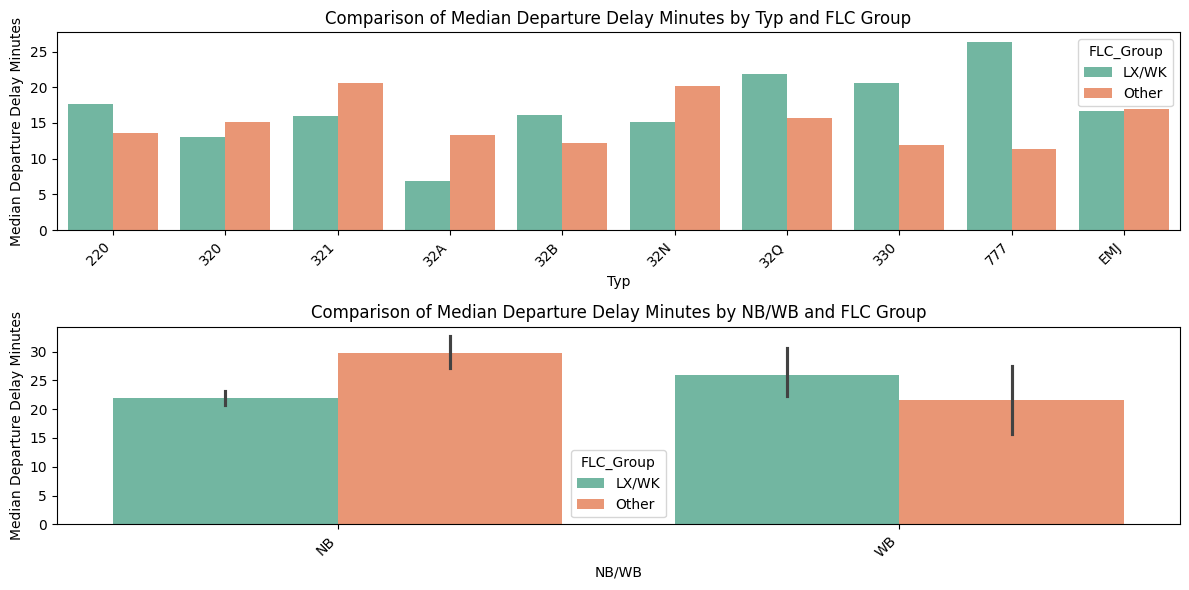

In [ ]:
flights_commercial.head()
# Plotting with Seaborn
plt.figure(figsize=(12, 6))

#Plot Schengen
plt.subplot(2,1,1)
sns.barplot(data=CarrierTypTest_melted, x='TYP', y='MedianDepartureDelayMinutes', hue='FLC_Group', palette='Set2')

# Adding titles and labels
plt.title('Comparison of Median Departure Delay Minutes by Typ and FLC Group')
plt.xlabel('Typ')
plt.ylabel('Median Departure Delay Minutes')
plt.xticks(rotation=45, ha='right')

plt.subplot(2,1,2)
sns.barplot(data=flights_commercial, x='NB_WB', y='DepartureDelayMinutes', hue='FLC_Group', palette='Set2')

# Adding titles and labels
plt.title('Comparison of Median Departure Delay Minutes by NB/WB and FLC Group')
plt.xlabel('NB/WB')
plt.ylabel('Median Departure Delay Minutes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

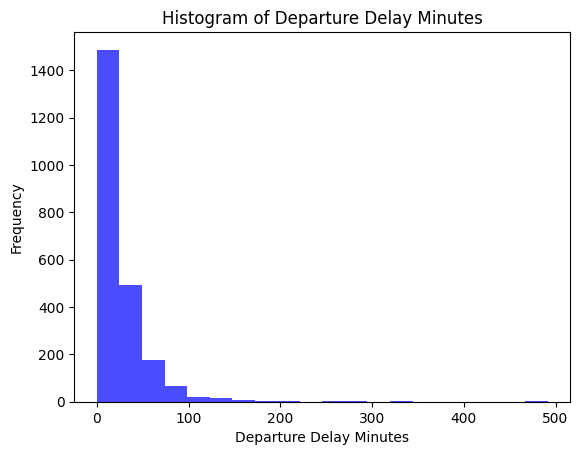

In [ ]:
# Checking for Normality


plt.hist(flights_commercial['DepartureDelayMinutes'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Departure Delay Minutes')
plt.xlabel('Departure Delay Minutes')
plt.ylabel('Frequency')
plt.show()

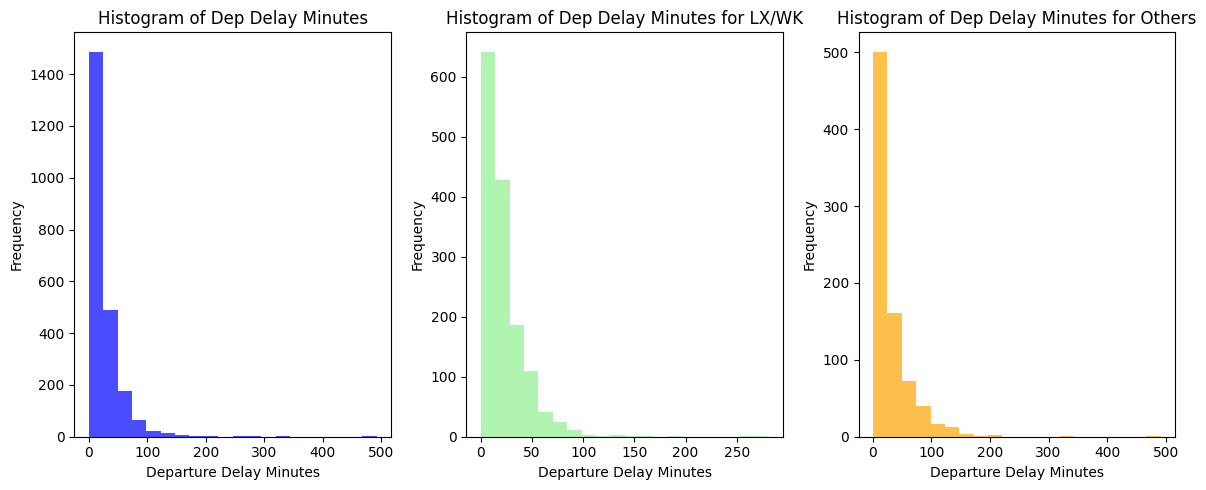

In [ ]:
plt.figure(figsize=(12, 5))

# First subplot
plt.subplot(1, 3, 1)
plt.hist(flights_commercial['DepartureDelayMinutes'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Dep Delay Minutes')
plt.xlabel('Departure Delay Minutes')
plt.ylabel('Frequency')


# Second subplot
plt.subplot(1, 3, 2)
data_lx_wk = flights_commercial[flights_commercial['FLC_Group'] == 'LX/WK']['DepartureDelayMinutes']
plt.hist(data_lx_wk, bins=20, color='lightgreen', alpha=0.7)
plt.title('Histogram of Dep Delay Minutes for LX/WK')
plt.xlabel('Departure Delay Minutes')
plt.ylabel('Frequency')

# Third subplot
plt.subplot(1, 3, 3)
data_others = flights_commercial[flights_commercial['FLC_Group'] == 'Other']['DepartureDelayMinutes']
plt.hist(data_others, bins=20, color='orange', alpha=0.7)
plt.title('Histogram of Dep Delay Minutes for Others')
plt.xlabel('Departure Delay Minutes')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjusts subplot parameters to give a nice fit
plt.show()


Not Normally distributed --> Positive Skew
--Y one tailed Mann whitney U test  

Hypotheses:
Null Hypothesis (H₀): The DepartureDelayMinutes for the LX/WK group is not significantly lower than that for the Other group.
Alternative Hypothesis (H₁): The DepartureDelayMinutes for the LX/WK group is significantly lower than that for the Other group.



In [ ]:
# Separate the data into two groups based on FLC_Group
group_lx_wk = flights_commercial[flights_commercial['FLC_Group'] == 'LX/WK']['DepartureDelayMinutes'].dropna()
group_other = flights_commercial[flights_commercial['FLC_Group'] == 'Other']['DepartureDelayMinutes'].dropna()

# Perform the one-tailed Mann-Whitney U test
# alternative='less' tests if group_lx_wk has significantly lower values than group_other
stat, p_value = mannwhitneyu(group_lx_wk, group_other, alternative='less')

# Display the results
print('Mann-Whitney U test statistic:', stat)
print('p-value:', p_value)

Mann-Whitney U test statistic: 582892.5
p-value: 0.26377486619505386


P Value > 0.05
-- Null Hypothesis can not be rejected

Test for only NB

In [ ]:
# Separate the data into two groups based on FLC_Group
flights_commercial_nb = flights_commercial[flights_commercial['NB_WB'] == 'NB']
group_lx_wk_nb = flights_commercial_nb[flights_commercial_nb['FLC_Group'] == 'LX/WK']['DepartureDelayMinutes'].dropna()
group_other_nb = flights_commercial_nb[flights_commercial_nb['FLC_Group'] == 'Other']['DepartureDelayMinutes'].dropna()

# Perform the one-tailed Mann-Whitney U test
# alternative='less' tests if group_lx_wk has significantly lower values than group_other
stat, p_value = mannwhitneyu(group_lx_wk_nb, group_other_nb, alternative='less')

# Display the results
print('Mann-Whitney U test statistic:', stat)
print('p-value:', p_value)

Mann-Whitney U test statistic: 441871.5
p-value: 0.019538811407998662


 for only the NB there is  Statistical significance visible!


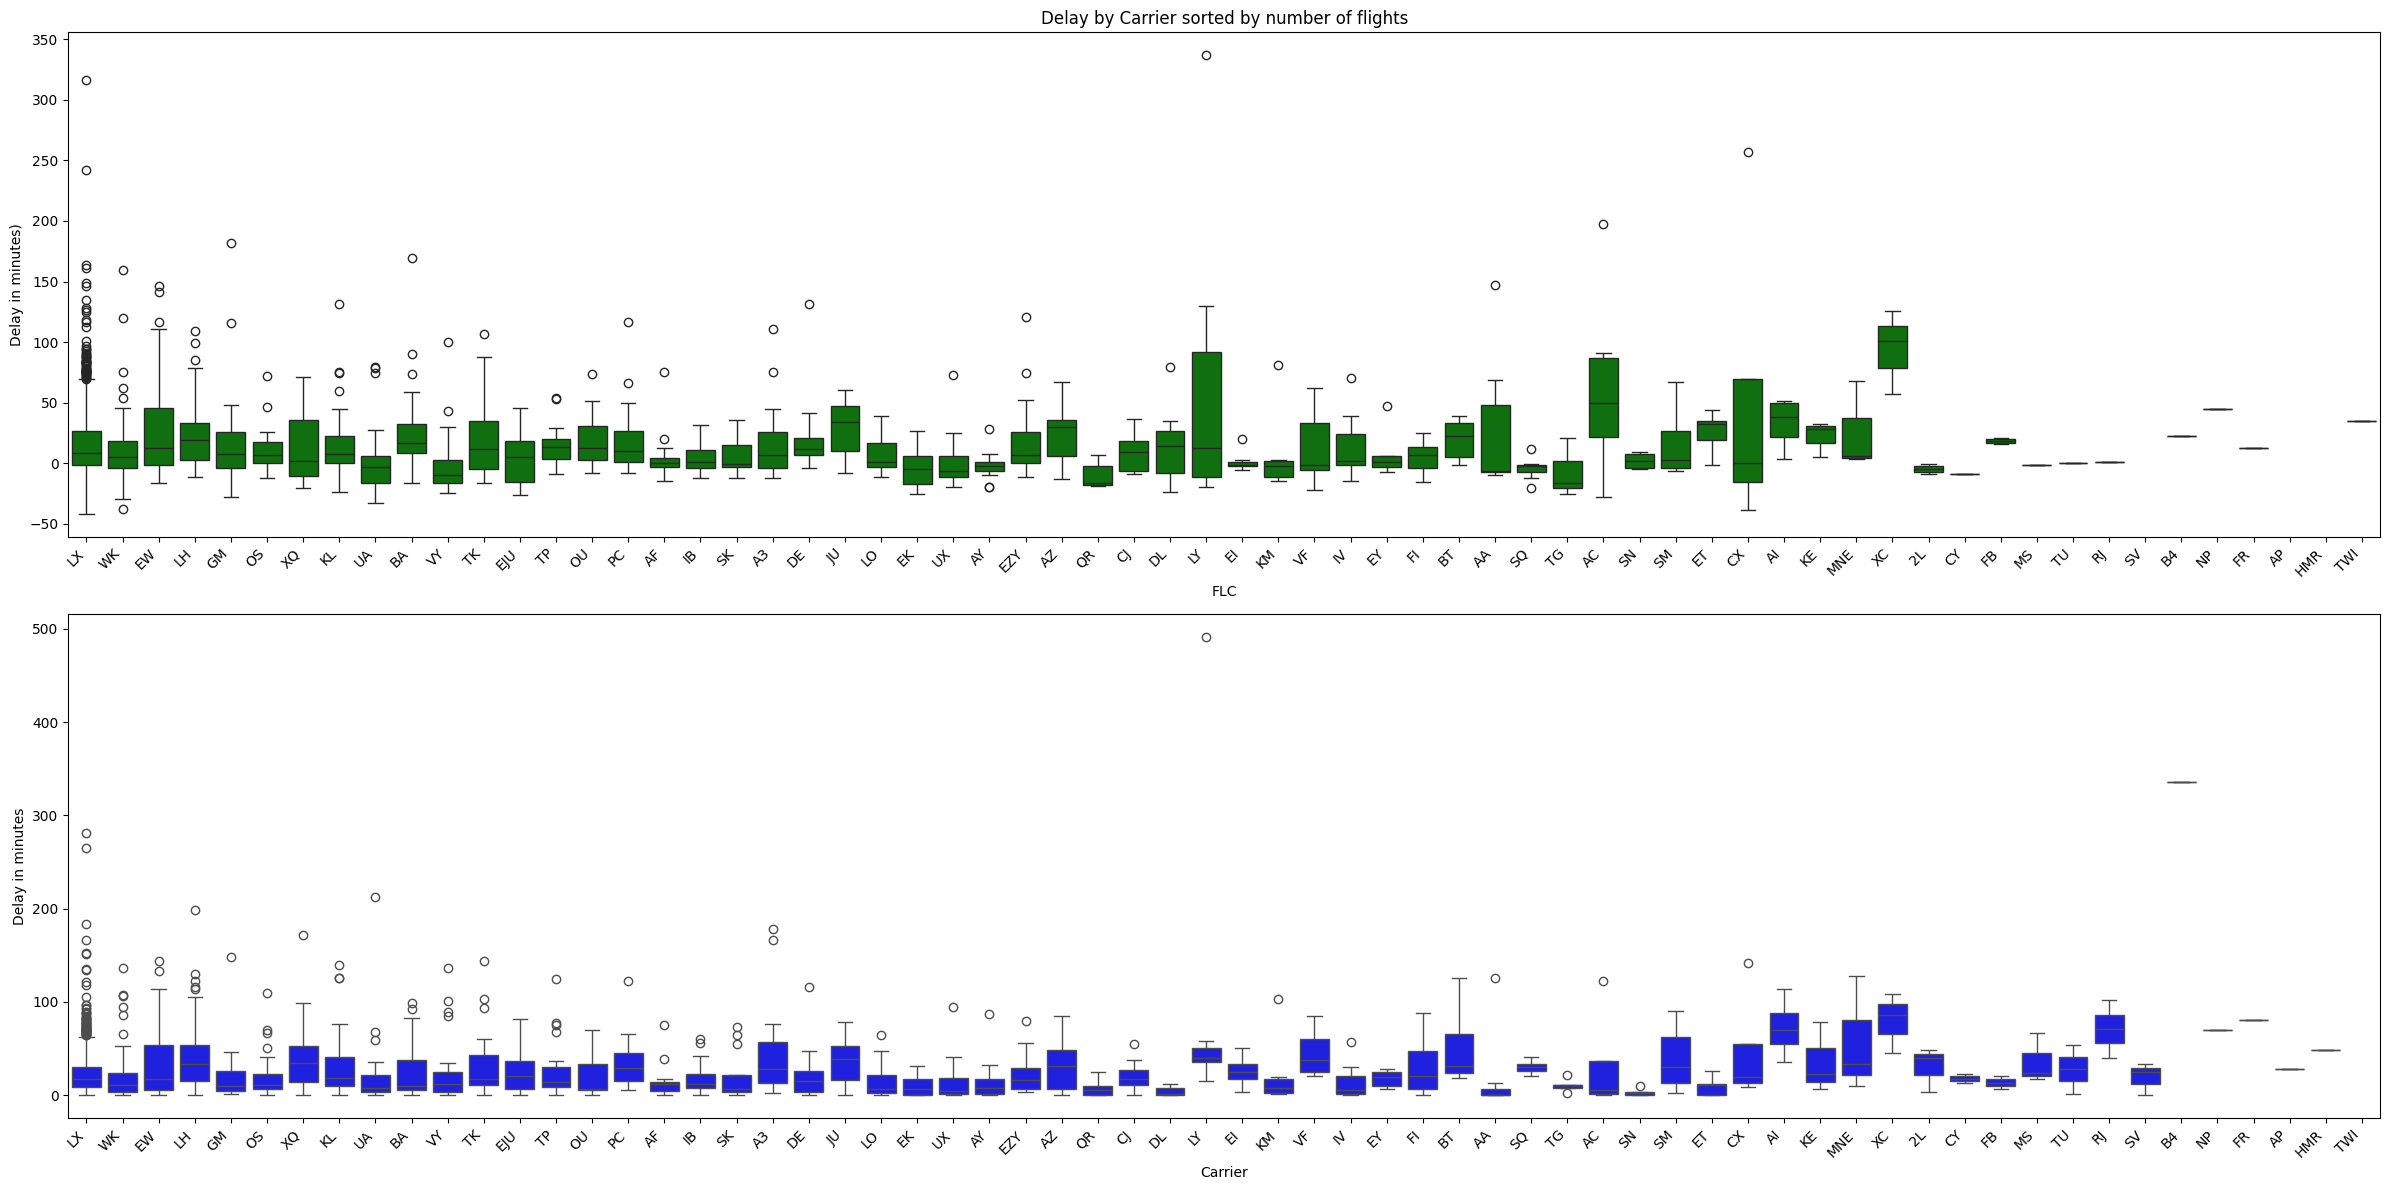

In [ ]:
#Sort delays by FLC
plt.figure(figsize=(24,12))

plt.subplot(2,1,1)
sns.boxplot(x='FLC', y='ArrivalDelayMinutes', data=flights_commercial, order = flights_commercial['FLC'].value_counts().index, color = 'green')
plt.title('Delay by Carrier sorted by number of flights')
plt.ylabel('Delay in minutes)')
plt.xticks(rotation=45, ha='right')



plt.subplot(2,1,2)
sns.boxplot(x='FLC', y='DepartureDelayMinutes', data=flights_commercial, order = flights_commercial['FLC'].value_counts().index, color = 'blue')
plt.xlabel('Carrier')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Delay in minutes')

plt.tight_layout()
plt.show()


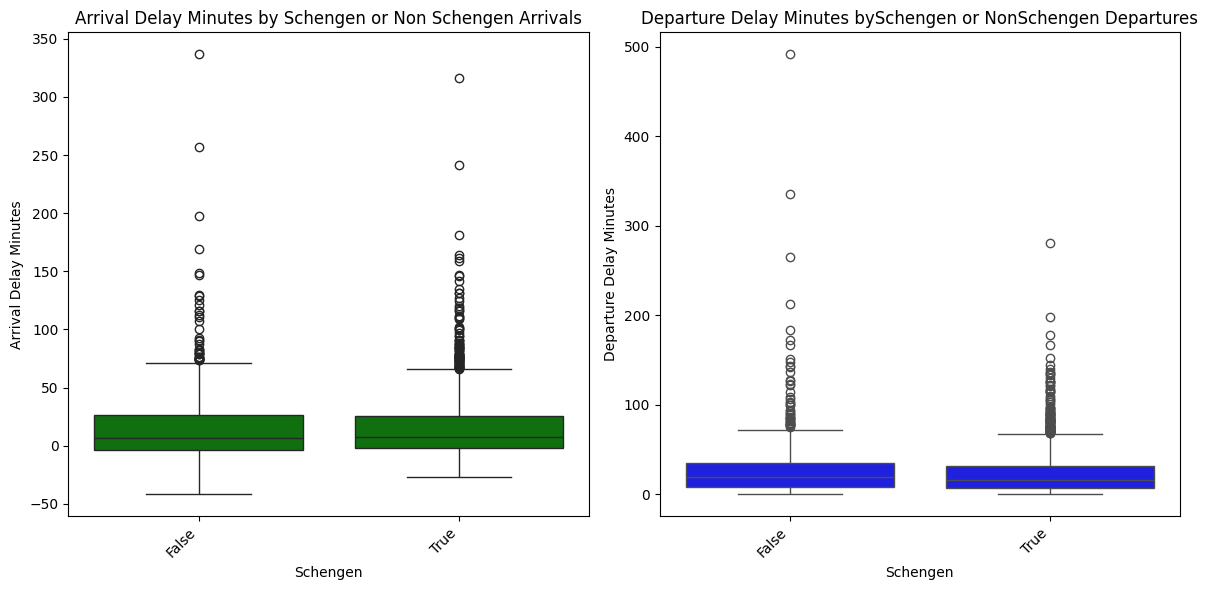

In [ ]:
##############################################
# Can be discarded later - just for checking #
##############################################
plt.figure(figsize=(12,6))

fltArr = flights_commercial[flights_commercial['flightType']=='A']
fltDep = flights_commercial[flights_commercial['flightType']=='D']


plt.subplot(1,2,1)
sns.boxplot(x='isSchengen', y='ArrivalDelayMinutes', data=fltArr, color = 'green')
plt.title('Arrival Delay Minutes by Schengen or Non Schengen Arrivals')
plt.ylabel('Arrival Delay Minutes')
plt.xlabel('Schengen')
plt.xticks(rotation=45, ha='right')

plt.subplot(1,2,2)
sns.boxplot(x = 'isSchengen', y= 'DepartureDelayMinutes', data= fltDep, color = 'blue')
plt.title('Departure Delay Minutes bySchengen or NonSchengen Departures')
plt.ylabel('Departure Delay Minutes')
plt.xlabel('Schengen')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:


# Transform to Datetime, get the Hour, fill the NA with -1 or 0, then convert to integer
fltArr['ActArrHour'] = pd.to_datetime(fltArr['ATA'], errors='coerce').dt.hour.fillna(0).astype('Int64')
fltArr['SchedArrHour'] = pd.to_datetime(fltArr['STA'], errors='coerce').dt.hour.fillna(0).astype('Int64')
fltDep['ActDepHour'] = pd.to_datetime(fltDep['ATD'], errors='coerce').dt.hour.fillna(0).astype('Int64')
fltDep['SchedDepHour'] = pd.to_datetime(fltDep['STD'], errors='coerce').dt.hour.fillna(0).astype('Int64')


# Check the result
fltArr.head()

<ipython-input-23-068747fee460>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fltArr['ActArrHour'] = pd.to_datetime(fltArr['ATA'], errors='coerce').dt.hour.fillna(0).astype('Int64')
<ipython-input-23-068747fee460>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fltArr['SchedArrHour'] = pd.to_datetime(fltArr['STA'], errors='coerce').dt.hour.fillna(0).astype('Int64')
<ipython-input-23-068747fee460>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,id,flightType,SDT,STA,TER,FLC,airlineLogo,FLN,REG,cityEn,...,PDS,ArrivalDelayMinutes,DepartureDelayMinutes,time_category,time_category_actual,isDelayed,NB_WB,FLC_Group,ActArrHour,SchedArrHour
0,1721816,A,2024-09-05T00:00:00Z,2024-09-05 07:25:00+00:00,2,LX,https://media.flughafen-zuerich.ch/-/jssmedia/...,1683,HBAZG,Florence,...,NaN,-9.616667,NaN,06:00–13:30,06:00–13:30,False,NB,LX/WK,7,7
1,1721817,A,2024-09-05T00:00:00Z,2024-09-05 08:25:00+00:00,1,KM,https://media.flughafen-zuerich.ch/-/jssmedia/...,492,9HNEH,Malta,...,NaN,1.616667,NaN,06:00–13:30,06:00–13:30,False,NB,Other,8,8
2,1721818,A,2024-09-05T00:00:00Z,2024-09-05 16:25:00+00:00,1,LX,https://media.flughafen-zuerich.ch/-/jssmedia/...,1211,HBAZL,Oslo,...,NaN,-4.533333,NaN,15:00–22:30,15:00–22:30,False,NB,LX/WK,16,16
3,1721819,A,2024-09-05T00:00:00Z,2024-09-05 08:55:00+00:00,2,AA,https://media.flughafen-zuerich.ch/-/jssmedia/...,92,N879BH,Philadelphia,...,NaN,27.883333,NaN,06:00–13:30,06:00–13:30,True,WB,Other,9,8
4,1721820,A,2024-09-05T00:00:00Z,2024-09-05 16:55:00+00:00,1,LX,https://media.flughafen-zuerich.ch/-/jssmedia/...,1223,HBAZK,Gothenburg,...,NaN,29.016667,NaN,15:00–22:30,15:00–22:30,True,NB,LX/WK,17,16


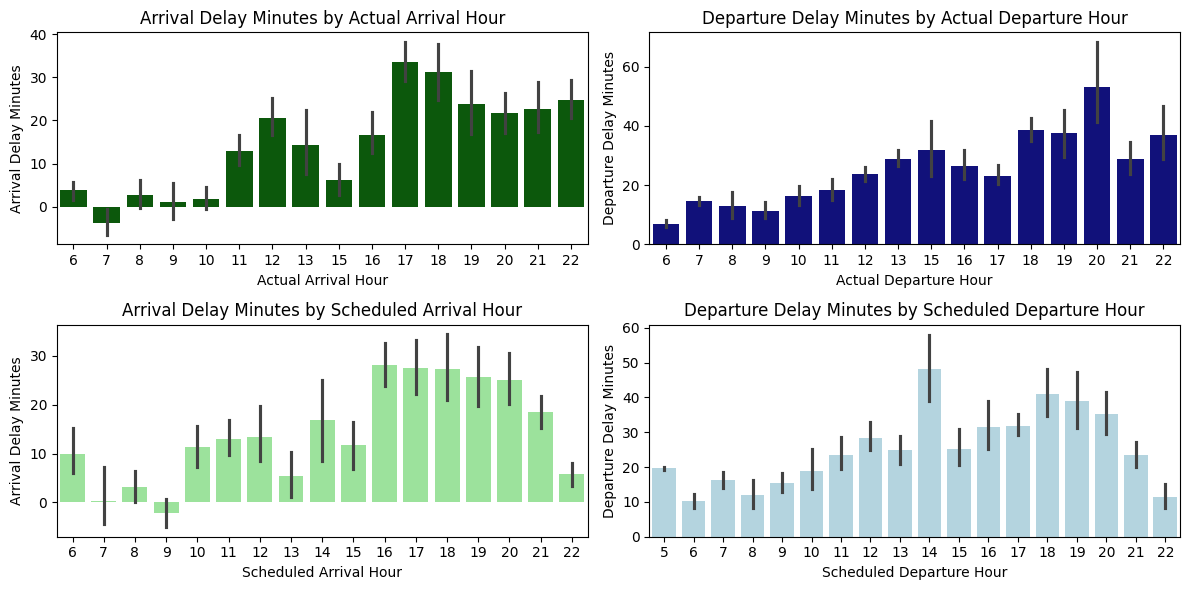

In [ ]:

plt.figure(figsize=(12, 6))

# Subplot 1: Arrival Delay Minutes by Actual Arrival Hour
plt.subplot(2, 2, 1)
sns.barplot(x='ActArrHour', y='ArrivalDelayMinutes', data=fltArr, color='darkgreen')
plt.title('Arrival Delay Minutes by Actual Arrival Hour')
plt.ylabel('Arrival Delay Minutes')
plt.xlabel('Actual Arrival Hour')

# Subplot 2: Departure Delay Minutes by Actual Departure Hour
plt.subplot(2, 2, 2)
sns.barplot(x='ActDepHour', y='DepartureDelayMinutes', data=fltDep, color='darkblue')
plt.title('Departure Delay Minutes by Actual Departure Hour')
plt.ylabel('Departure Delay Minutes')
plt.xlabel('Actual Departure Hour')

# Subplot 3: Arrival Delay Minutes by Scheduled Arrival Hour
plt.subplot(2, 2, 3)
sns.barplot(x='SchedArrHour', y='ArrivalDelayMinutes', data=fltArr, color='lightgreen')
plt.title('Arrival Delay Minutes by Scheduled Arrival Hour')
plt.ylabel('Arrival Delay Minutes')
plt.xlabel('Scheduled Arrival Hour')

# Subplot 4: Departure Delay Minutes by Actual Departure Hour
plt.subplot(2, 2, 4)
sns.barplot(x='SchedDepHour', y='DepartureDelayMinutes', data=fltDep, color='lightblue')
plt.title('Departure Delay Minutes by Scheduled Departure Hour')
plt.ylabel('Departure Delay Minutes')
plt.xlabel('Scheduled Departure Hour')
# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

  SchedArr15Min SchedDep15Min
0         07:15           NaN
1         08:15           NaN
2         16:15           NaN
3         08:45           NaN
4         16:45           NaN


<ipython-input-67-ee35a2258a02>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_flights['SchedArr15Min'] = filtered_flights['STA'].dt.floor('15T').dt.strftime('%H:%M')
<ipython-input-67-ee35a2258a02>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_flights['SchedDep15Min'] = filtered_flights['STD'].dt.floor('15T').dt.strftime('%H:%M')


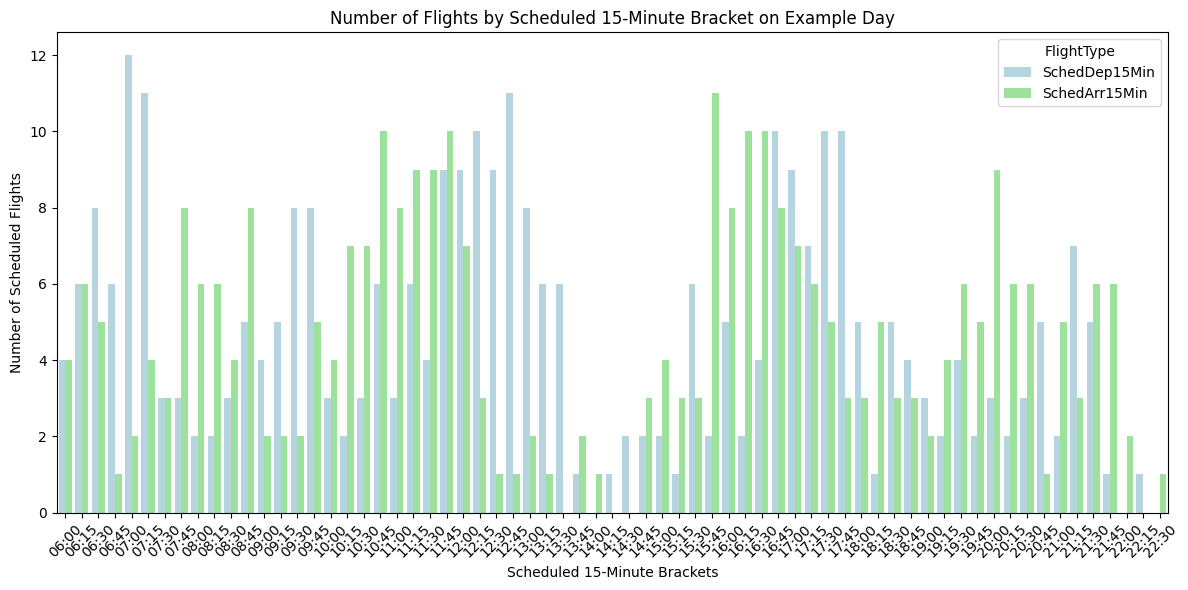

In [ ]:


# Convert to datetime
flights_commercial['STA'] = pd.to_datetime(flights_commercial['STA'], errors='coerce')
flights_commercial['STD'] = pd.to_datetime(flights_commercial['STD'], errors='coerce')

# Filter the data for September 01, 2024
specific_date = '2024-09-01'
filtered_flights = flights_commercial[
    (flights_commercial['STA'].dt.date == pd.to_datetime(specific_date).date()) |
    (flights_commercial['STD'].dt.date == pd.to_datetime(specific_date).date())
]

# Round down to nearest 15-minute bracket
filtered_flights['SchedArr15Min'] = filtered_flights['STA'].dt.floor('15T').dt.strftime('%H:%M')
filtered_flights['SchedDep15Min'] = filtered_flights['STD'].dt.floor('15T').dt.strftime('%H:%M')

# Reshape the data for better visualization
flights_long = pd.melt(filtered_flights,
                       value_vars=['SchedDep15Min', 'SchedArr15Min'],
                       var_name='FlightType',
                       value_name='15MinBracket')

# Convert '15MinBracket' to datetime for sorting
flights_long['15MinBracketTime'] = pd.to_datetime(flights_long['15MinBracket'], format='%H:%M')

# Sort the data by '15MinBracketTime'
flights_long = flights_long.sort_values(by='15MinBracketTime')

plt.figure(figsize=(12, 6))
sns.countplot(x='15MinBracket', hue='FlightType', data=flights_long,
              palette={'SchedDep15Min': 'lightblue', 'SchedArr15Min': 'lightgreen'})
plt.title('Number of Flights by Scheduled 15-Minute Bracket on Example Day')
plt.ylabel('Number of Scheduled Flights')
plt.xlabel('Scheduled 15-Minute Brackets')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<ipython-input-27-0c699ac7a5eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fltDep['Type'] = 'Actual'


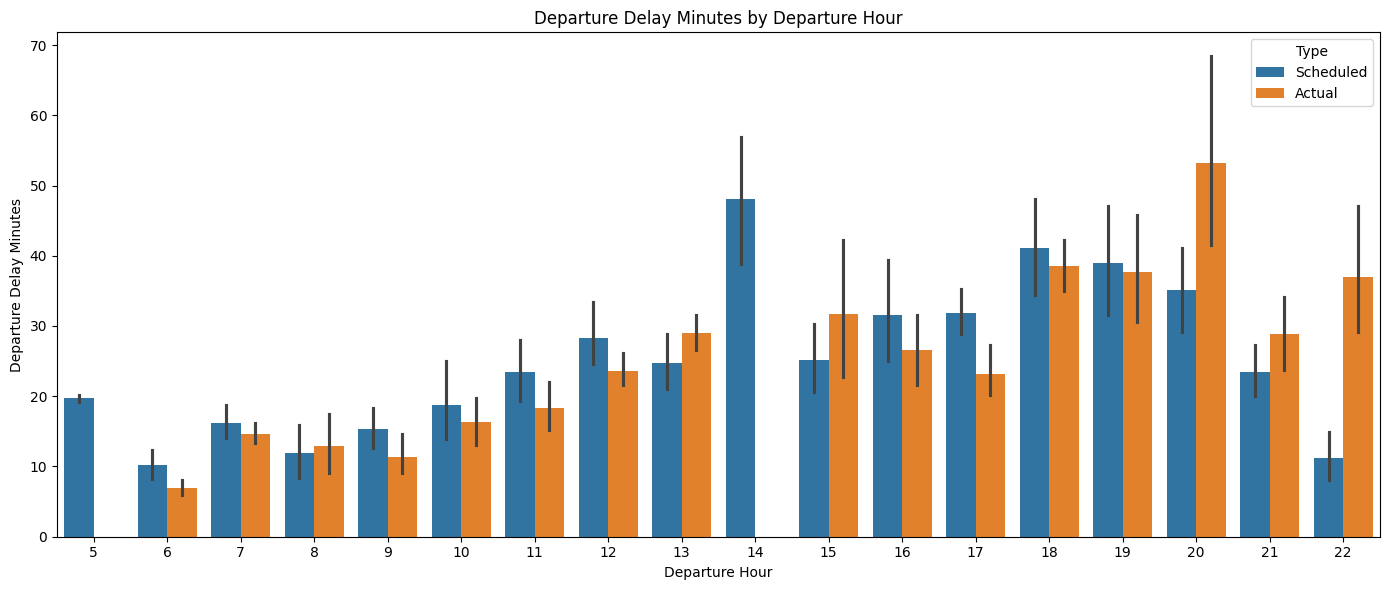

In [ ]:

# Combine actual and scheduled data for departure
fltDep['Type'] = 'Actual'
fltDep_scheduled = fltDep.copy()
fltDep_scheduled['Type'] = 'Scheduled'
fltDep_scheduled['ActDepHour'] = fltDep_scheduled['SchedDepHour']
combined_dep = pd.concat([fltDep[['ActDepHour', 'DepartureDelayMinutes', 'Type']],
                          fltDep_scheduled[['ActDepHour', 'DepartureDelayMinutes', 'Type']]])

plt.figure(figsize=(14, 6))

# Departure Delay Minutes by Actual and Scheduled Departure Hour

sns.barplot(x='ActDepHour', y='DepartureDelayMinutes', hue='Type', data=combined_dep)
plt.title('Departure Delay Minutes by Departure Hour')
plt.ylabel('Departure Delay Minutes')
plt.xlabel('Departure Hour')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


###Observations###  

| Observation             | Result|
|-------------------------|-------|
| Number of Days observed |
|Total Arrivals |{total_arrivals}|
|Total Departures|XX|
|Total Flights|XX|
|Number of Different Airlines|XX|
|Number of different TYP|XX|
|Number of different Manufacturers |XX|
|number of different Origins|XX|
|Number of different Destinations|XX|
|Mean Arrival Delay |XX|
|Median Arrival Delay |XX|
|25% Arrival Delay |XX|
|75% Arrival Delay |XX|
|Mean Departure Delay |XX|
|Median Departure Delay |XX|
|25% Departure Delay |XX|
|75% Departure Delay |XX|
|xx |XX|
|XX|XX|



Following, we show an example of a flight from Sao Paulo to Zurich and a connecting flight to Palma, for which a transfer time of 45-minutes is estimated. However, small delays on the first flight can occur for various reasons, many of which may be beyond the airport's control. There could be traffic restrictions around airspaces in Europe, the weather on route could cause additional flight time or waiting times at the security check may cause longer check-in times at the departure airport.


#### Table 3: Delay in an arrival flight
| Scheduled Departure Time | Actual Departure Time | Scheduled Arrival Time | Actual Arrival Time | Origin | Destination |
|-------|-----|-------|---|-------|---|
| 18:32 (-1) | 18:32 (-1) | 10:40 | 10:55 | Sao Paolo | Zurich |
| 11:25 | --:-- | 13:10 | --:-- | Zurich | Palma |  

As passengers arrive from São Paulo with a 15-minute delay, the remaining  connection time is reduced to only 30 minutes. As they must change gates and also go through a security check and passport control in Zurich, catching the connection flight can already be at risk. At this point, a good allocation of resources and people at these crucial turnover points can significantly impact the passengers transfer time and thus, whether they will catch a connecting flight or not.

### **Appendix**

In [ ]:
###############################################################
### APPENDIX: Code to retrieve daily API data ###
###############################################################

# import libraries
import time
import requests
import pandas as pd
from datetime import datetime
from google.colab import files
import glob
# fetching data

r=requests.get("https://dxp-fds.flughafen-zuerich.ch/flights")
print(r)
list_data = r.json()
df = pd.DataFrame(list_data)


# Filter for Today only
todayDT = datetime.now()
todayDAY = todayDT.strftime('%Y-%m-%d')
today = todayDAY + 'T00:00:00Z'
#today

df_today = df[df['SDT']== today]
#df_today
# select specific columns
selected_columns = ['id', 'flightType', 'SDT', 'STA', 'TER', 'FLC', 'airlineLogo', 'FLN',
       'REG',  'cityEn', 'POR', 'ICT', 'TYP', 'model', 'manufacturerName', 'isCommercial', 'airline',
       'codeShare', 'isSchengen', 'ETA', 'ATA', 'RTK', 'FBR', 'LBR',
       'statusCode', 'statusTextEn', 'STD', 'ATD', 'GAT',
       'PDS']

df_today_selected = df_today[selected_columns]
#display(df_today_selected)

# save to csv - timestamp in UTC
filename = f"FlightData_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
df_today_selected.to_csv(filename, index = False)

In [ ]:
###############################################################
### APPENDIX: Code to merge into one data set ###
###############################################################
# Combine -CSV to one dataframe
# import libraries
import time
import requests
import pandas as pd
from datetime import datetime
from google.colab import files
import glob
uploaded = files.upload()

In [ ]:
# Create Filepath for all the Flightdata documents in the Colab Folder
filepath = 'FlightData_*.csv'
all_files = glob.glob(filepath)

# Create an empty list to store Dataframes
df_list =[]

# loop over all files and reat them into a dataframe and append to the list
for document in all_files:
  df = pd.read_csv(document)
  df_list.append(df)

combined_flights = pd.concat(df_list, ignore_index=True)
combined_flights.head()

combined_flights.to_csv(filepath, index = False)


In [ ]:
combined_flights.info()